In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
#Import the required libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,log_loss

import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")


from datetime import date as dt
from datetime import datetime,timedelta

Kaggle dataset link:  https://www.kaggle.com/datasets/prasad22/healthcare-dataset

In [5]:
data = pd.read_csv("/content/healthcare_dataset.csv")


In [6]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [7]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


**EDA**

In [8]:
data.shape

(55500, 15)

In [9]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [11]:
data.describe(include= "object").T

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Date of Admission,55500,1827,2024-03-16,50
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Discharge Date,55500,1856,2020-03-15,53


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [13]:
data.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [14]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

**Data Visualization**

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

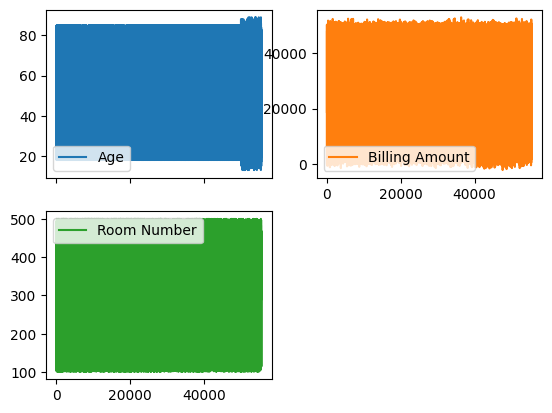

In [16]:
data.plot(subplots=True, layout=(2,2))

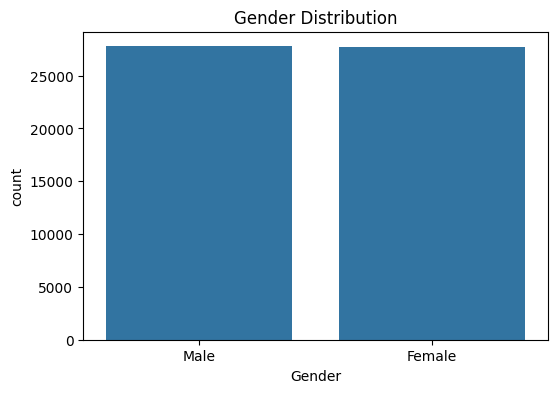

In [17]:
df = pd.DataFrame(data)

# Bar Plot for Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

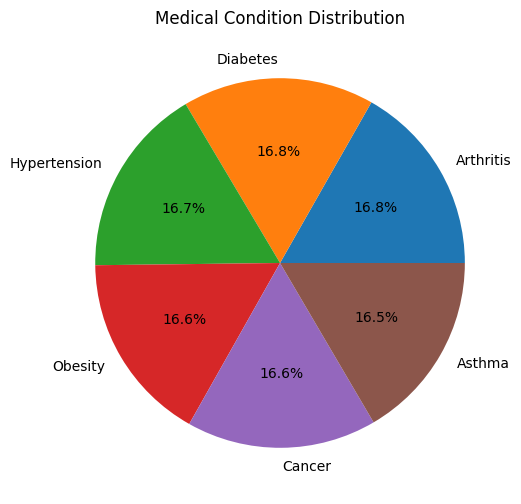

In [ ]:
#Pie chart: medical conditions
plt.figure(figsize=(6, 6))
df['Medical Condition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Medical Condition Distribution')
plt.ylabel('')
plt.show()

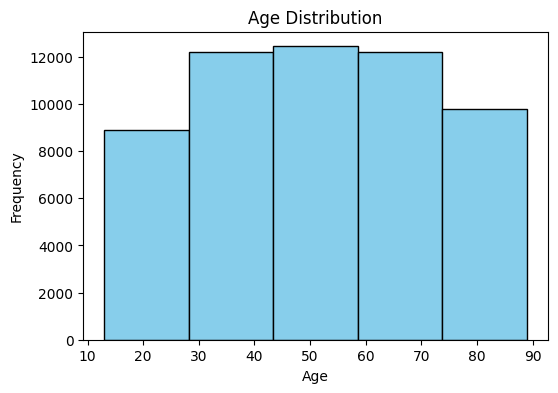

In [ ]:
# Histogram: Age Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

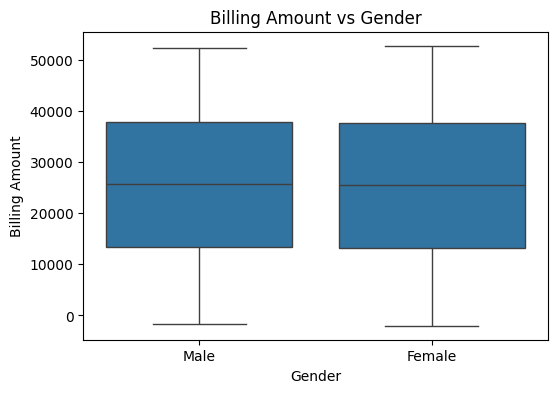

In [ ]:

#Box Plot of Billing Amount VS Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.title('Billing Amount vs Gender')
plt.show()

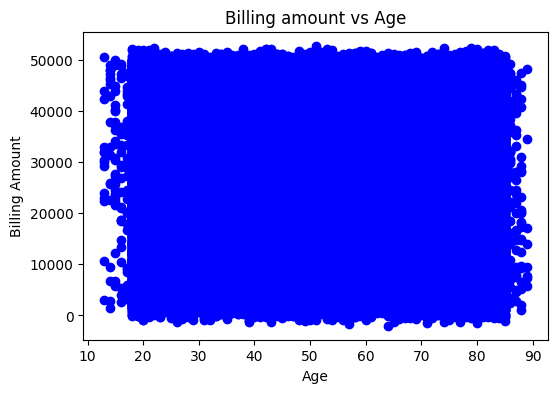

In [ ]:
# Scatter Plot of Age vs Billing Amount
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Billing Amount'], color='blue')
plt.title('Billing amount vs Age')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

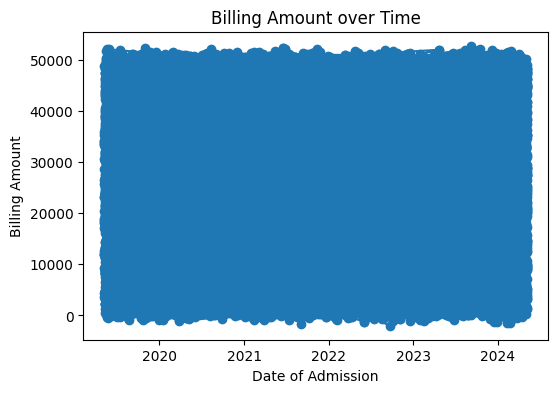

In [ ]:
# Convert 'Date of Admission' to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Line Plot of Billing Amount over Time
plt.figure(figsize=(6, 4))
plt.plot(df['Date of Admission'], df['Billing Amount'], marker='o')
plt.title('Billing Amount over Time')
plt.xlabel('Date of Admission')
plt.ylabel('Billing Amount')
plt.show()

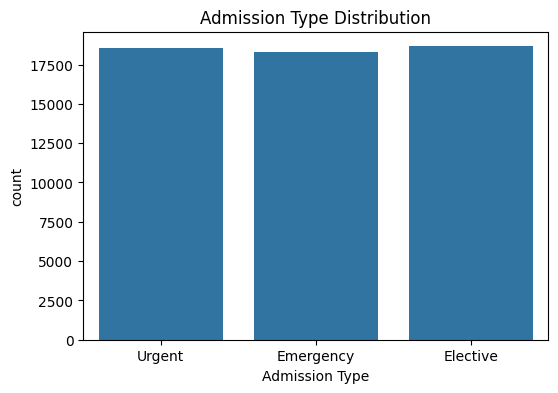

In [ ]:
#Count Plot of Admission Type
plt.figure(figsize=(6, 4))
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Type Distribution')
plt.show()

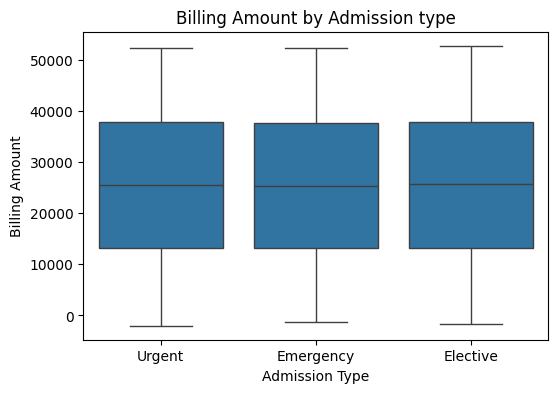

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.title('Billing Amount by Admission type')
plt.show()

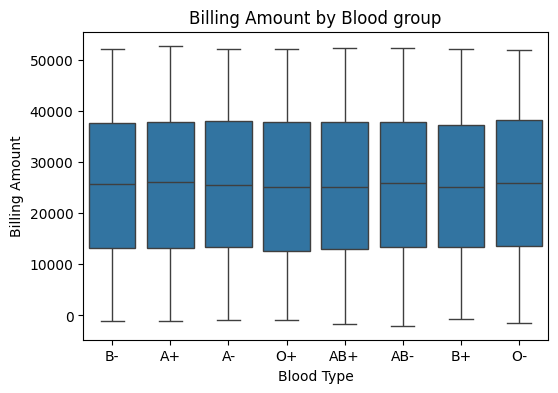

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Blood Type', y='Billing Amount', data=df)
plt.title('Billing Amount by Blood group')
plt.show()

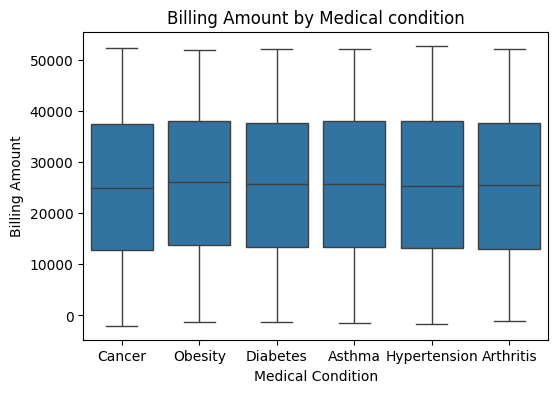

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Billing Amount by Medical condition')
plt.show()

<Axes: >

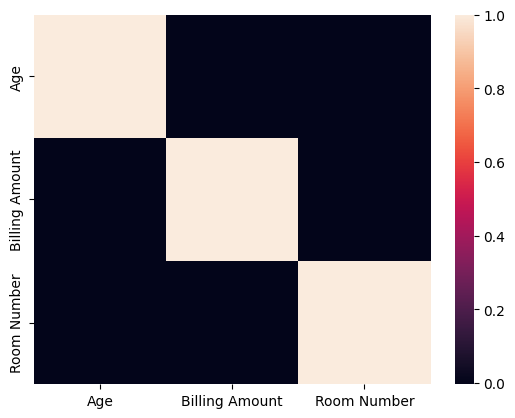

In [18]:
# calculate the correlation matrix on the numeric columns
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

Ther is no significant correlation between age and billing amount.

**Regression**


Predicting Billing amount for the ages by using Linear regression and Lasso.

In [19]:
#Splitting the data
X = data['Age'].values.reshape(-1, 1)
y = data['Billing Amount'].values.reshape(-1, 1)

In [21]:
# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[25637.82477997]
[[-2.06414724]]


In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([[25559.38718499],
       [25532.55327091],
       [25476.82129553],
       ...,
       [25580.02865735],
       [25499.52691513],
       [25598.60598248]])

In [25]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,35216.479396,25559.387185
1,49044.552609,25532.553271
2,25686.646570,25476.821296
3,48071.960174,25598.605982
4,13328.396860,25534.617418
...,...,...
11095,15289.194744,25511.911799
11096,15646.529029,25507.783504
11097,22501.150522,25580.028657
11098,32361.855310,25499.526915


In [26]:
#y_test.to_numpy()
y_test.shape

(11100, 1)

In [27]:
y_pred.shape


(11100, 1)

In [28]:
y_pred = np.array(y_pred).T
y_pred

array([[25559.38718499, 25532.55327091, 25476.82129553, ...,
        25580.02865735, 25499.52691513, 25598.60598248]])

In [30]:
y_pred = np.reshape(y_pred, -1)
y_pred

array([25559.38718499, 25532.55327091, 25476.82129553, ...,
       25580.02865735, 25499.52691513, 25598.60598248])

In [29]:
X_test= np.reshape(X_test, -1)
X_test

array([38, 51, 78, ..., 28, 67, 19])

In [31]:
Final_pred = pd.DataFrame({"Age":X_test,"Billing amount":y_pred})


In [32]:
Final_pred.to_csv("Final Predicted billing amount for age Linear regression.csv", index = False)

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12295.712152020222
Mean Squared Error: 202584280.70492148
Root Mean Squared Error: 14233.210484810568


In [34]:
#Lasso model for prediction
# Splitting data into 80% training and 20% testing
#Rerun the following code otherwise will get error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)
pred_test_lasso= model_lasso.predict(X_test)

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test_lasso))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_lasso)))

Mean Absolute Error: 12295.712152108861
Mean Squared Error: 202584280.7764024
Root Mean Squared Error: 14233.210487321629


In [36]:
X_test= np.reshape(X_test, -1)
Final_pred_Lasso = pd.DataFrame({"Age":X_test,"Billing amount":pred_test_lasso}) #rerun X_test=np.reshape(X_test, -1) if error


In [37]:
Final_pred_Lasso.to_csv("Final Predicted billing amount for age by Lasso.csv", index = False)

Prediction by Linear regression is better than Lasso because root mean squared error is smaller for Linear regression.

**Classification**

In [38]:
print(data.groupby('Gender').size())

Gender
Female    27726
Male      27774
dtype: int64


In [39]:
print(df.groupby('Blood Type').size())

Blood Type
A+     6956
A-     6969
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
dtype: int64


In [40]:
print(df.groupby('Medical Condition').size())

Medical Condition
Arthritis       9308
Asthma          9185
Cancer          9227
Diabetes        9304
Hypertension    9245
Obesity         9231
dtype: int64


In [41]:
print(df.groupby('Doctor').size())

Doctor
Aaron Acevedo      1
Aaron Adams        1
Aaron Aguilar      1
Aaron Alexander    1
Aaron Anderson     1
                  ..
Zoe Khan           1
Zoe Knight         1
Zoe Nichols        1
Zoe Roberts        1
Zoe Wallace        1
Length: 40341, dtype: int64


In [42]:
print(df.groupby('Admission Type').size())

Admission Type
Elective     18655
Emergency    18269
Urgent       18576
dtype: int64


In [43]:
print(df.groupby('Medication').size())

Medication
Aspirin        11094
Ibuprofen      11127
Lipitor        11140
Paracetamol    11071
Penicillin     11068
dtype: int64


In [44]:
print(df.groupby('Test Results').size())

Test Results
Abnormal        18627
Inconclusive    18356
Normal          18517
dtype: int64


In [45]:
#Split data into test and train
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [46]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=122)

# dimension of train and test dataset
print('Dimension of training data: ', train.shape)
print('Dimension of test data: ', test.shape)

Dimension of training data:  (44400, 15)
Dimension of test data:  (11100, 15)


In [47]:
Xtrain = train.drop(columns=['Gender', 'Name', 'Doctor', 'Hospital', 'Billing Amount', 'Date of Admission', 'Discharge Date'], axis=1)
ytrain = train['Gender']

Xtest = test.drop(columns=['Gender', 'Name', 'Doctor', 'Hospital', 'Billing Amount', 'Date of Admission', 'Discharge Date'], axis=1)
ytest = test['Gender']
df['Name'] = df['Name'].str.lower()
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,elizabeth jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,kyle perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,heather wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,jennifer jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

# extracted the list of categorical columns to be encoded using OneHotEncoder
excluded_col = 'Name', 'Doctor', 'Hospital', 'Billing Amount', 'Date of Admission', 'Discharge Date'
categorical_col = [col for col in Xtrain.columns if col != excluded_col]

# define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_col)
    ],
    remainder='passthrough'
)

# create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MaxAbsScaler())
])

# process the train and test data
Xtrain_transformed = pipeline.fit_transform(Xtrain)
Xtest_transformed = pipeline.transform(Xtest)


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

In [51]:
#create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best Accuracy:  0.5059459459459459


In [52]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

 #get the best model
best_logreg = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.505990990990991


Logistic Regression classifier with accuracy 0.50599 is better than Decision tree classifier with accuracy 0.50595.